In [5]:
install.packages("viridis")
library(viridis)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘gridExtra’


Loading required package: viridisLite



Ejecutando Escenario 1 
Ejecutando Escenario 2 
Ejecutando Escenario 3 
Ejecutando Escenario 4 


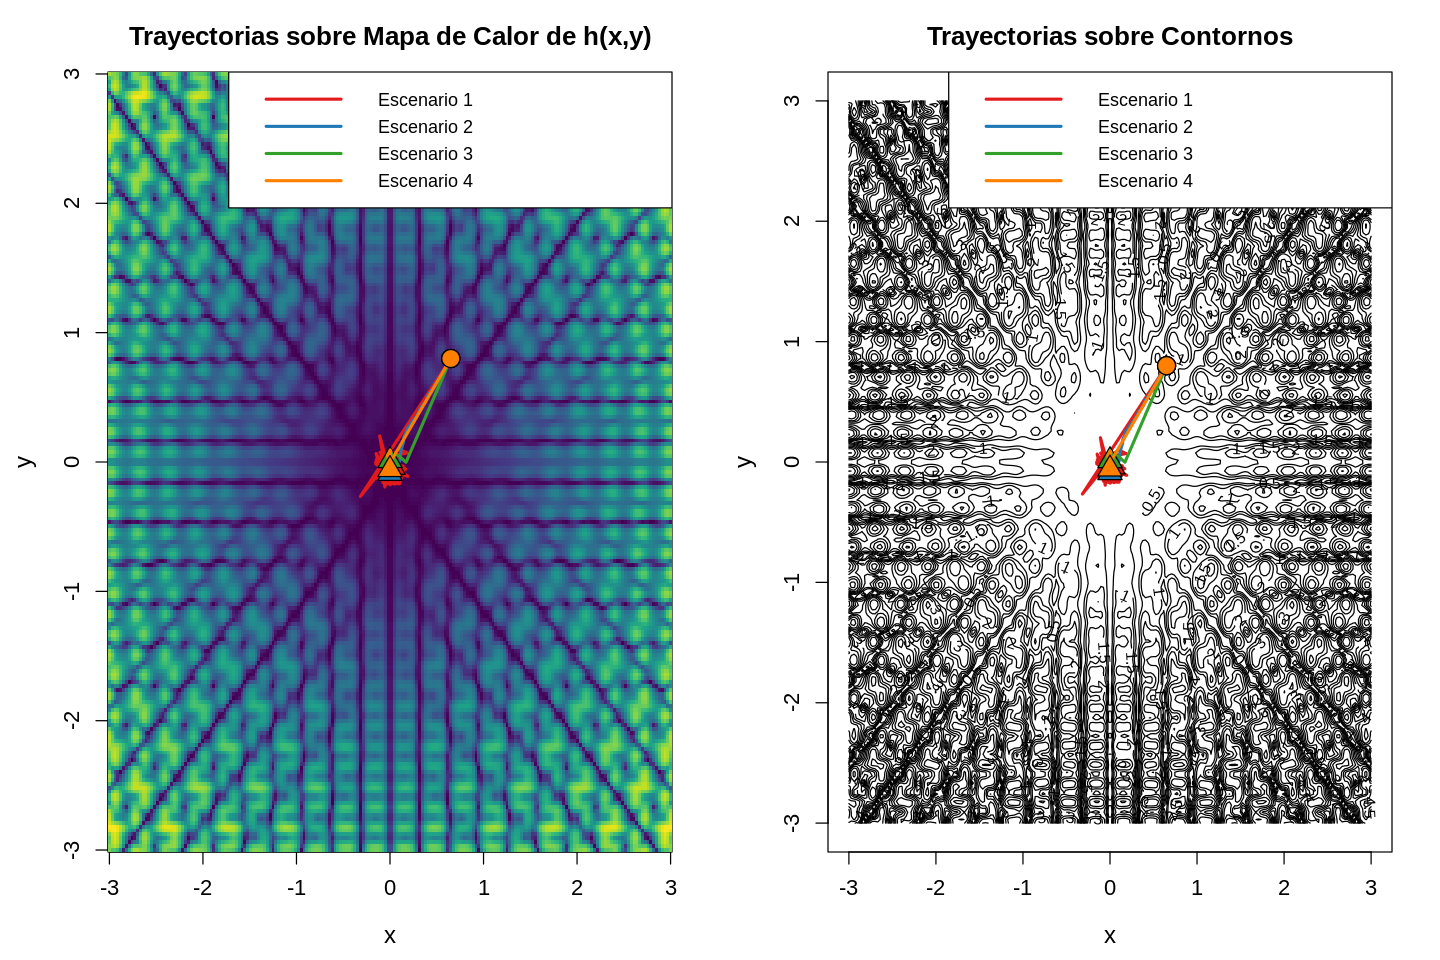

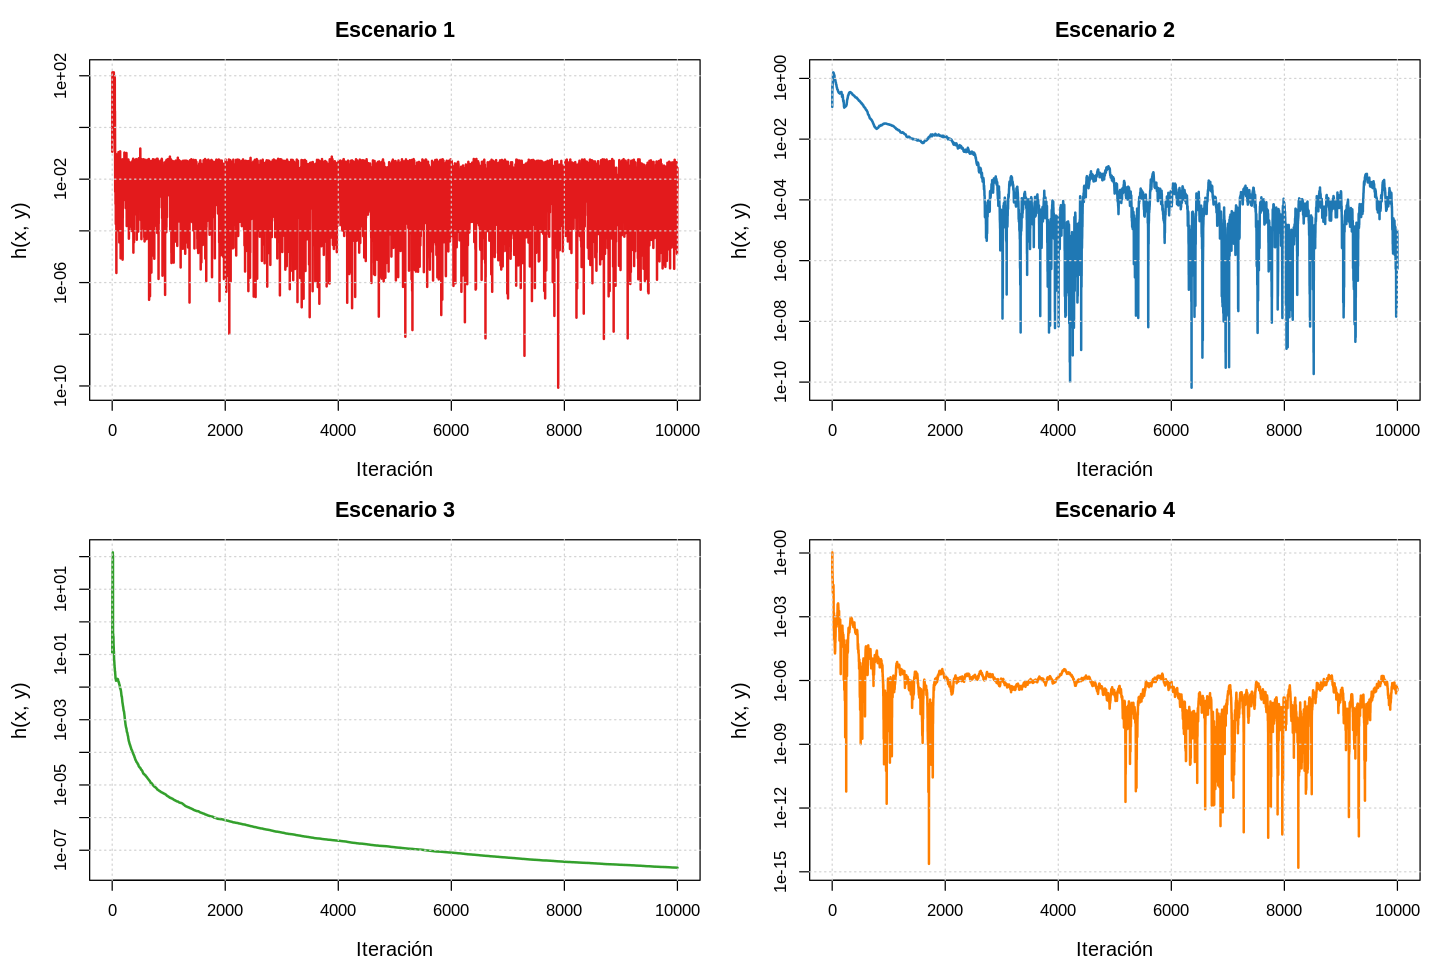


✓ Gráficos mejorados generados exitosamente


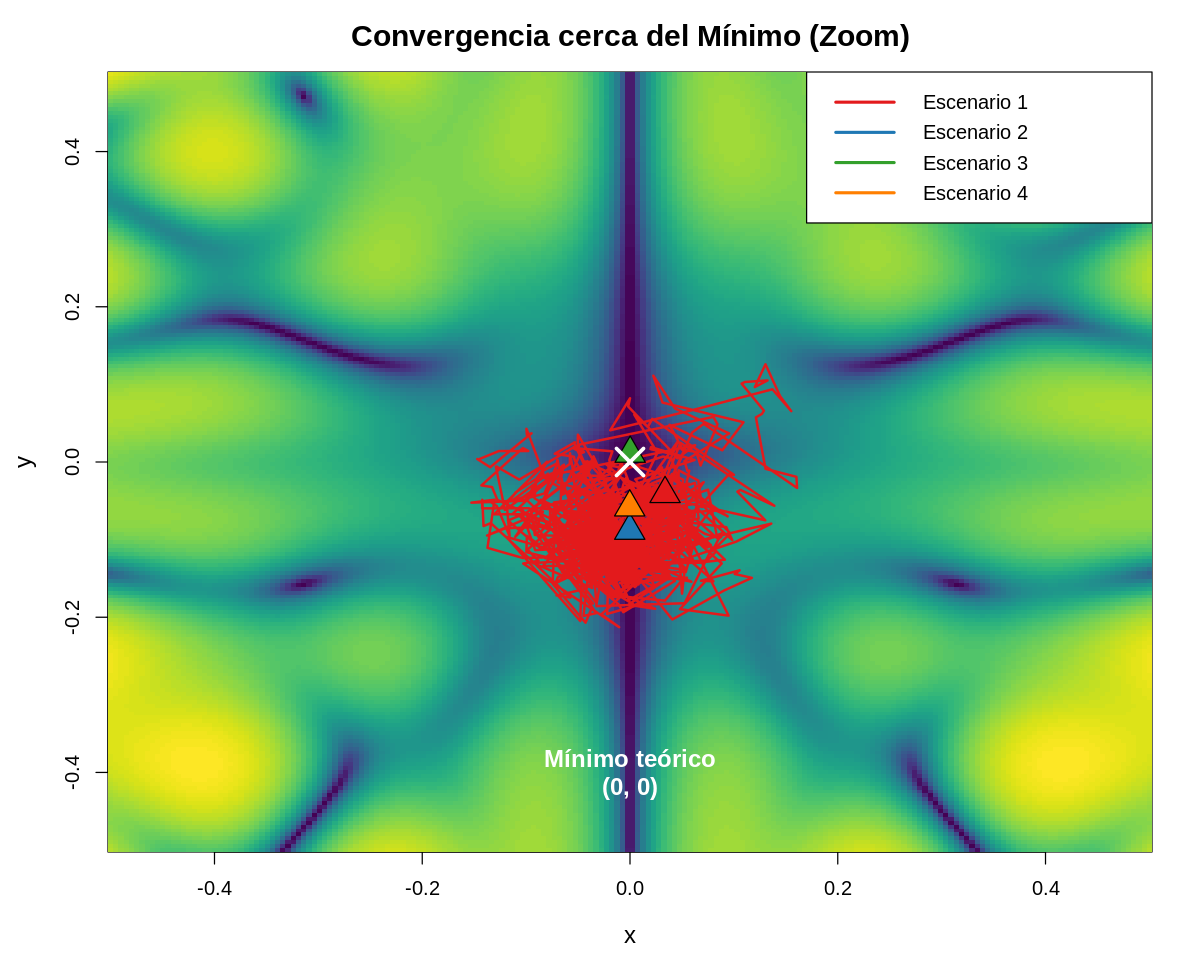

In [7]:
# ========================================
# MÉTODO DEL GRADIENTE ESTOCÁSTICO - VERSIÓN MEJORADA
# ========================================

library(viridis)

# Definir la función objetivo
h <- function(x, y) {
  term1 <- (x * sin(20*y) + y * sin(20*x))^2 * cosh(sin(10*x) * x)
  term2 <- (x * cos(10*y) - y * sin(10*x))^2 * cosh(cos(20*y) * y)
  return(term1 + term2)
}

# Generar vector aleatorio en esfera unitaria
random_sphere <- function(dim = 2) {
  z <- rnorm(dim)
  return(z / sqrt(sum(z^2)))
}

# Aproximación del gradiente
delta_h <- function(x, beta, h_func) {
  zeta <- random_sphere(2)
  x_plus <- x + beta * zeta
  x_minus <- x - beta * zeta

  h_plus <- h_func(x_plus[1], x_plus[2])
  h_minus <- h_func(x_minus[1], x_minus[2])

  grad_approx <- ((h_plus - h_minus) / (2 * beta)) * zeta
  return(grad_approx)
}

# Proyectar al dominio [-3, 3]
project_domain <- function(x) {
  return(pmax(-3, pmin(3, x)))
}

# Algoritmo del gradiente estocástico
stochastic_gradient <- function(x0, n_iter, alpha_func, beta_func, h_func) {
  trajectory <- matrix(NA, nrow = n_iter + 1, ncol = 2)
  h_values <- numeric(n_iter + 1)

  trajectory[1, ] <- x0
  h_values[1] <- h_func(x0[1], x0[2])

  x_current <- x0

  for (j in 1:n_iter) {
    alpha_j <- alpha_func(j)
    beta_j <- beta_func(j)

    grad <- delta_h(x_current, beta_j, h_func)
    x_current <- x_current - alpha_j * grad
    x_current <- project_domain(x_current)

    trajectory[j + 1, ] <- x_current
    h_values[j + 1] <- h_func(x_current[1], x_current[2])
  }

  return(list(trajectory = trajectory, h_values = h_values))
}

# Definir los escenarios
scenarios <- list(
  list(name = "Escenario 1",
       alpha = function(j) 1 / log(j + 1),
       beta = function(j) 1 / log(j + 1)^0.1),

  list(name = "Escenario 2",
       alpha = function(j) 1 / (100 * log(j + 1)),
       beta = function(j) 1 / log(j + 1)^0.1),

  list(name = "Escenario 3",
       alpha = function(j) 1 / (j + 1),
       beta = function(j) 1 / (j + 1)^0.5),

  list(name = "Escenario 4",
       alpha = function(j) 1 / (j + 1),
       beta = function(j) 1 / (j + 1)^0.1)
)

# Ejecutar simulaciones
set.seed(123)
x0 <- c(0.65, 0.8)
n_iter <- 10000

results <- list()
for (i in 1:4) {
  cat("Ejecutando", scenarios[[i]]$name, "\n")
  results[[i]] <- stochastic_gradient(x0, n_iter,
                                      scenarios[[i]]$alpha,
                                      scenarios[[i]]$beta,
                                      h)
}

# ========================================
# GRÁFICO 1: TRAYECTORIAS SIMPLIFICADAS
# ========================================

options(repr.plot.width=12, repr.plot.height=8)

# Crear grilla más fina para mejor visualización
x_seq <- seq(-3, 3, length.out = 200)
y_seq <- seq(-3, 3, length.out = 200)
z_grid <- outer(x_seq, y_seq, h)

# Usar solo cada N-ésimo punto para las trayectorias
subsample <- 50

par(mfrow=c(1,2), mar=c(4.5, 4.5, 3, 2))

# Panel izquierdo: Mapa de calor
image(x_seq, y_seq, log(z_grid + 1), col = viridis(100),
      xlab = "x", ylab = "y",
      main = "Trayectorias sobre Mapa de Calor de h(x,y)",
      cex.main = 1.3, cex.lab = 1.2, cex.axis = 1.1)

colors <- c("#E31A1C", "#1F78B4", "#33A02C", "#FF7F00")
for (i in 1:4) {
  traj <- results[[i]]$trajectory
  idx <- seq(1, nrow(traj), by = subsample)
  lines(traj[idx, 1], traj[idx, 2], col = colors[i], lwd = 2.5, lty = 1)
  points(traj[1, 1], traj[1, 2], pch = 21, col = "black", bg = colors[i], cex = 2)
  points(traj[nrow(traj), 1], traj[nrow(traj), 2], pch = 24, col = "black", bg = colors[i], cex = 2)
}
legend("topright", legend = sapply(scenarios, function(s) s$name),
       col = colors, lwd = 2.5, cex = 0.9, bg = "white")

# Panel derecho: Contornos
contour(x_seq, y_seq, log(z_grid + 1), nlevels = 20,
        xlab = "x", ylab = "y",
        main = "Trayectorias sobre Contornos",
        cex.main = 1.3, cex.lab = 1.2, cex.axis = 1.1,
        labcex = 0.8)

for (i in 1:4) {
  traj <- results[[i]]$trajectory
  idx <- seq(1, nrow(traj), by = subsample)
  lines(traj[idx, 1], traj[idx, 2], col = colors[i], lwd = 2.5, lty = 1)
  points(traj[1, 1], traj[1, 2], pch = 21, col = "black", bg = colors[i], cex = 2)
  points(traj[nrow(traj), 1], traj[nrow(traj), 2], pch = 24, col = "black", bg = colors[i], cex = 2)
}
legend("topright", legend = sapply(scenarios, function(s) s$name),
       col = colors, lwd = 2.5, cex = 0.9, bg = "white")

# ========================================
# GRÁFICO 2: CONVERGENCIA
# ========================================

options(repr.plot.width=12, repr.plot.height=8)

par(mfrow=c(2,2), mar=c(4, 4.5, 3, 1))

for (i in 1:4) {
  plot(1:(n_iter+1), results[[i]]$h_values, type = "l", col = colors[i], lwd = 2,
       xlab = "Iteración", ylab = "h(x, y)",
       main = scenarios[[i]]$name,
       cex.main = 1.3, cex.lab = 1.2, log = "y")
  grid()
}

# ========================================
# GRÁFICO 3: ZOOM EN LA REGIÓN DE CONVERGENCIA
# ========================================

options(repr.plot.width=10, repr.plot.height=8)

par(mfrow=c(1,1), mar=c(4.5, 4.5, 3, 2))

# Zoom en región [-0.5, 0.5] x [-0.5, 0.5]
x_zoom <- seq(-0.5, 0.5, length.out = 200)
y_zoom <- seq(-0.5, 0.5, length.out = 200)
z_zoom <- outer(x_zoom, y_zoom, h)

image(x_zoom, y_zoom, log(z_zoom + 0.001), col = viridis(100),
      xlab = "x", ylab = "y",
      main = "Convergencia cerca del Mínimo (Zoom)",
      cex.main = 1.5, cex.lab = 1.2)

# Mostrar solo las últimas 1000 iteraciones
start_idx <- n_iter - 999

for (i in 1:4) {
  traj <- results[[i]]$trajectory[start_idx:(n_iter+1), ]
  lines(traj[, 1], traj[, 2], col = colors[i], lwd = 2, lty = 1)
  points(traj[nrow(traj), 1], traj[nrow(traj), 2], pch = 24, col = "black", bg = colors[i], cex = 2.5)
}

# Marcar el origen
points(0, 0, pch = 4, cex = 3, lwd = 3, col = "white")
text(0, -0.4, "Mínimo teórico\n(0, 0)", col = "white", cex = 1.2, font = 2)

legend("topright", legend = sapply(scenarios, function(s) s$name),
       col = colors, lwd = 2.5, cex = 1, bg = "white")

cat("\n✓ Gráficos mejorados generados exitosamente\n")

In [3]:
# Guardar el gráfico de 4 paneles
png("trajectories.png", width = 1400, height = 1200, res = 120)
par(mfrow=c(2,2))
for (i in 1:4) {
  contour(x_seq, y_seq, z_grid,
          nlevels = 25, xlab = "x", ylab = "y",
          main = scenarios[[i]]$name, cex.main = 1.5, col = "gray70")
  traj <- results[[i]]$trajectory
  n_points <- nrow(traj)
  color_gradient <- colorRampPalette(c("blue", "red"))(n_points)
  for (j in 1:(n_points-1)) {
    lines(traj[j:(j+1), 1], traj[j:(j+1), 2],
          col = color_gradient[j], lwd = 2)
  }
  points(traj[1, 1], traj[1, 2], pch = 19, col = "blue", cex = 2.5)
  points(traj[n_points, 1], traj[n_points, 2], pch = 17, col = "red", cex = 2.5)
  points(0, 0, pch = 4, col = "darkgreen", cex = 2, lwd = 3)
}
par(mfrow=c(1,1))
dev.off()

cat("Archivo guardado: trajectories.png\n")

agg_record_1846504492 
                    2

agg_record_1846504492 
                    2

Archivos guardados: trajectories.png y convergence.png


Ejecutando Escenario 1 
Ejecutando Escenario 2 
Ejecutando Escenario 3 
Ejecutando Escenario 4 

=== RESULTADOS FINALES ===
Escenario 1: x = (0.0338, -0.0410), h(x) = 0.004516
Escenario 2: x = (-0.0002, -0.0883), h(x) = 0.000001
Escenario 3: x = (0.0002, 0.0109), h(x) = 0.000000
Escenario 4: x = (-0.0003, -0.0582), h(x) = 0.000000


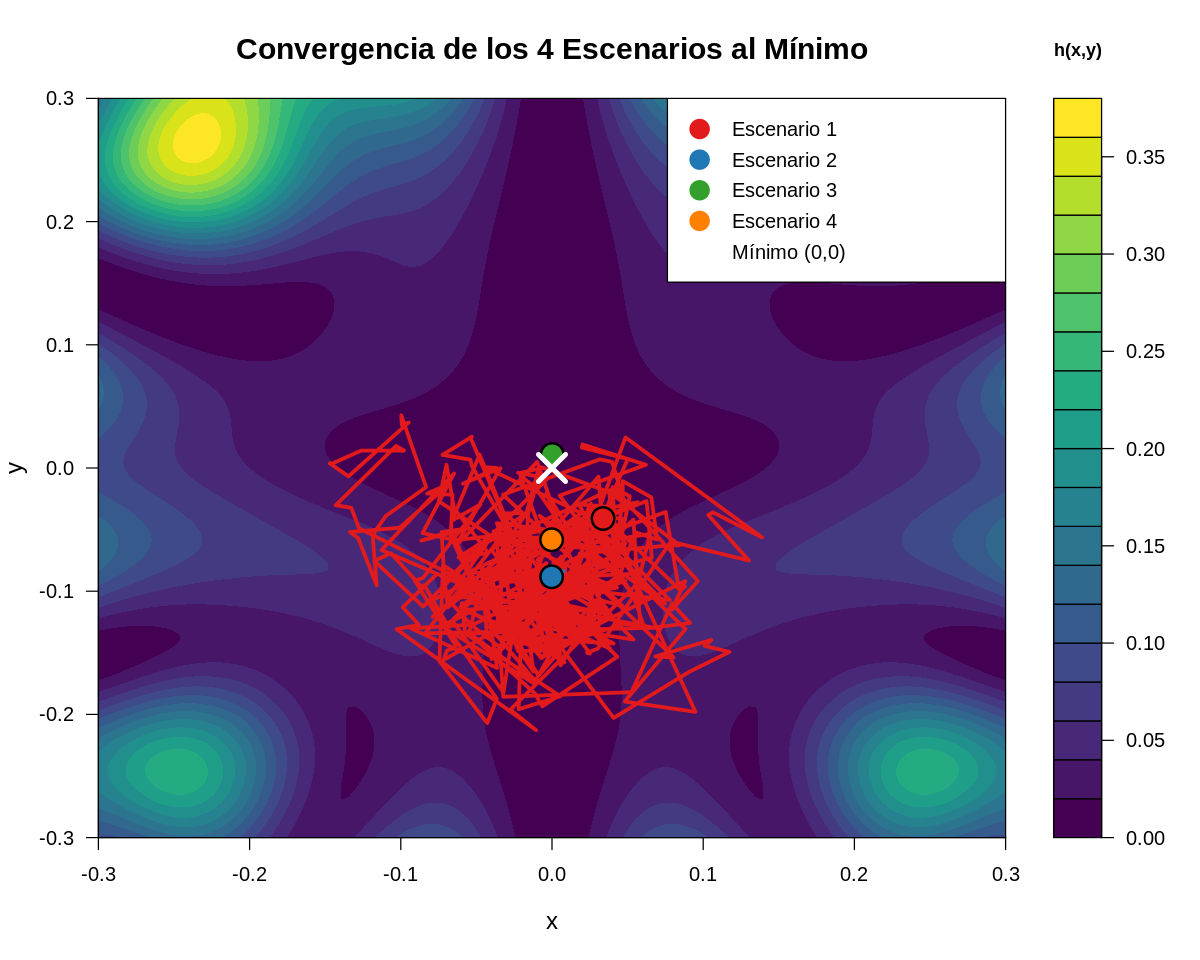


✓ Gráficos simplificados generados


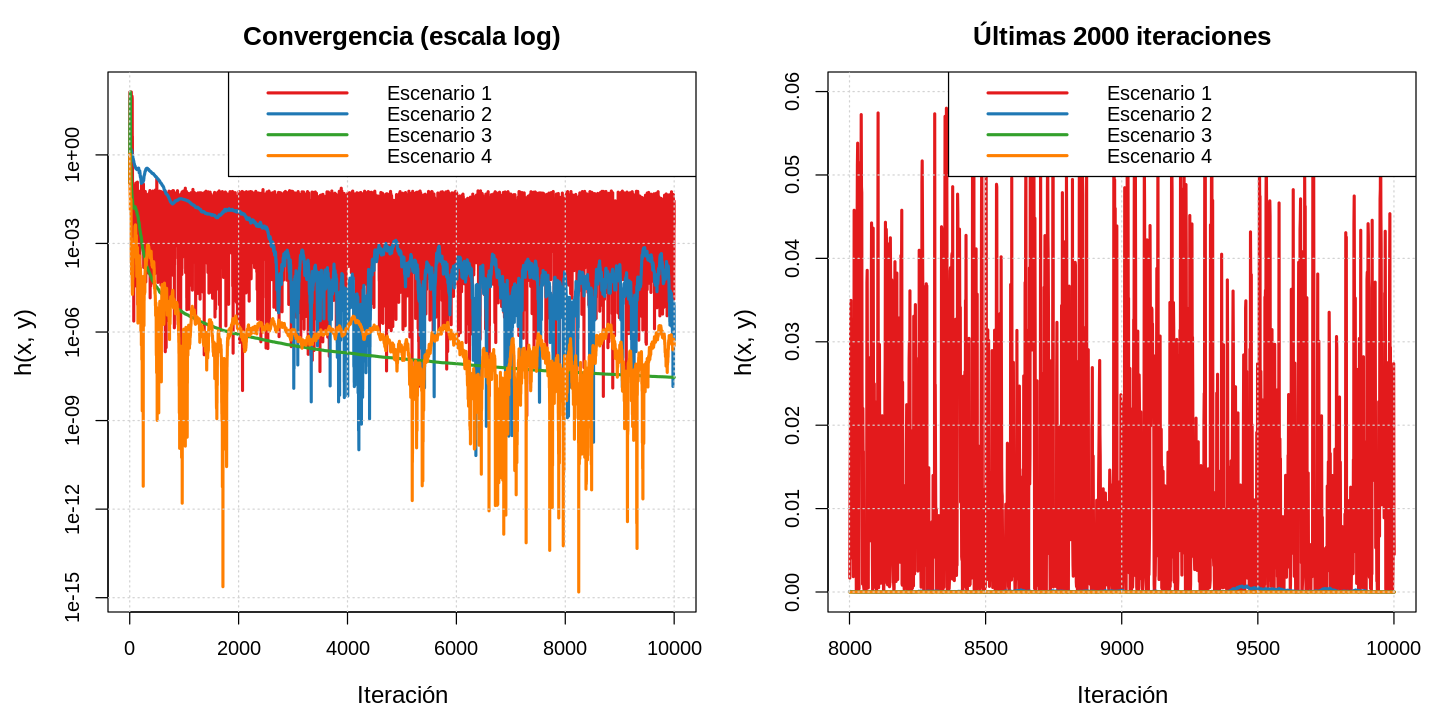

In [8]:
# ========================================
# VERSIÓN SIMPLIFICADA Y CLARA
# ========================================

library(viridis)

# [Mantener las mismas funciones h, random_sphere, delta_h, project_domain, stochastic_gradient y scenarios del código anterior]

# Ejecutar simulaciones
set.seed(123)
x0 <- c(0.65, 0.8)
n_iter <- 10000

results <- list()
for (i in 1:4) {
  cat("Ejecutando", scenarios[[i]]$name, "\n")
  results[[i]] <- stochastic_gradient(x0, n_iter,
                                      scenarios[[i]]$alpha,
                                      scenarios[[i]]$beta,
                                      h)
}

# Imprimir resultados
cat("\n=== RESULTADOS FINALES ===\n")
for (i in 1:4) {
  x_final <- results[[i]]$trajectory[n_iter + 1, ]
  h_final <- results[[i]]$h_values[n_iter + 1]
  cat(sprintf("%s: x = (%.4f, %.4f), h(x) = %.6f\n",
              scenarios[[i]]$name, x_final[1], x_final[2], h_final))
}

# ========================================
# GRÁFICO SIMPLE 1: SOLO LAS TRAYECTORIAS FINALES
# ========================================

options(repr.plot.width=10, repr.plot.height=8)

# Zoom en región [-0.3, 0.3] x [-0.3, 0.3]
x_zoom <- seq(-0.3, 0.3, length.out = 150)
y_zoom <- seq(-0.3, 0.3, length.out = 150)
z_zoom <- outer(x_zoom, y_zoom, h)

# Colores distintos para cada escenario
colors <- c("#E31A1C", "#1F78B4", "#33A02C", "#FF7F00")  # rojo, azul, verde, naranja

# Crear el gráfico
filled.contour(x_zoom, y_zoom, z_zoom,
               color.palette = function(n) viridis(n),
               plot.title = title(main = "Convergencia de los 4 Escenarios al Mínimo",
                                  xlab = "x", ylab = "y",
                                  cex.main = 1.5, cex.lab = 1.2),
               key.title = title(main = "h(x,y)", cex.main = 0.9),
               plot.axes = {
                 axis(1); axis(2)

                 # Mostrar solo las últimas 500 iteraciones de cada escenario
                 for (i in 1:4) {
                   traj <- results[[i]]$trajectory
                   start_idx <- max(1, nrow(traj) - 500)
                   lines(traj[start_idx:nrow(traj), 1],
                         traj[start_idx:nrow(traj), 2],
                         col = colors[i], lwd = 3)

                   # Punto final
                   points(traj[nrow(traj), 1], traj[nrow(traj), 2],
                          pch = 21, col = "black", bg = colors[i], cex = 2.5, lwd = 2)
                 }

                 # Marcar el origen (mínimo teórico)
                 points(0, 0, pch = 4, cex = 3, lwd = 4, col = "white")

                 # Leyenda
                 legend("topright",
                        legend = c("Escenario 1", "Escenario 2", "Escenario 3", "Escenario 4", "Mínimo (0,0)"),
                        col = c(colors, "white"),
                        pch = c(rep(21, 4), 4),
                        pt.bg = c(colors, NA),
                        pt.cex = c(rep(2, 4), 2.5),
                        pt.lwd = c(rep(2, 4), 3),
                        cex = 1,
                        bg = "white")
               })

# ========================================
# GRÁFICO SIMPLE 2: CONVERGENCIA EN EL TIEMPO
# ========================================

options(repr.plot.width=12, repr.plot.height=6)

par(mfrow=c(1,2), mar=c(4.5, 4.5, 3, 1))

# Panel 1: Escala logarítmica (toda la evolución)
plot(1:(n_iter+1), results[[1]]$h_values, type = "l", col = colors[1], lwd = 2.5,
     xlab = "Iteración", ylab = "h(x, y)",
     main = "Convergencia (escala log)",
     cex.main = 1.3, cex.lab = 1.2, log = "y",
     ylim = range(unlist(lapply(results, function(r) r$h_values))))

for (i in 2:4) {
  lines(1:(n_iter+1), results[[i]]$h_values, col = colors[i], lwd = 2.5)
}
grid()
legend("topright", legend = paste("Escenario", 1:4),
       col = colors, lwd = 2.5, cex = 1, bg = "white")

# Panel 2: Zoom en las últimas 2000 iteraciones
start_idx <- n_iter - 1999
plot(start_idx:(n_iter+1), results[[1]]$h_values[start_idx:(n_iter+1)],
     type = "l", col = colors[1], lwd = 2.5,
     xlab = "Iteración", ylab = "h(x, y)",
     main = "Últimas 2000 iteraciones",
     cex.main = 1.3, cex.lab = 1.2,
     ylim = range(unlist(lapply(results, function(r) r$h_values[start_idx:(n_iter+1)]))))

for (i in 2:4) {
  lines(start_idx:(n_iter+1), results[[i]]$h_values[start_idx:(n_iter+1)],
        col = colors[i], lwd = 2.5)
}
grid()
legend("topright", legend = paste("Escenario", 1:4),
       col = colors, lwd = 2.5, cex = 1, bg = "white")

cat("\n✓ Gráficos simplificados generados\n")

In [10]:
# ========================================
# SCRIPT COMPLETO PARA GENERAR Y GUARDAR IMÁGENES
# ========================================

library(viridis)

# Definir la función objetivo
h <- function(x, y) {
  term1 <- (x * sin(20*y) + y * sin(20*x))^2 * cosh(sin(10*x) * x)
  term2 <- (x * cos(10*y) - y * sin(10*x))^2 * cosh(cos(20*y) * y)
  return(term1 + term2)
}

# Generar vector aleatorio en esfera unitaria
random_sphere <- function(dim = 2) {
  z <- rnorm(dim)
  return(z / sqrt(sum(z^2)))
}

# Aproximación del gradiente
delta_h <- function(x, beta, h_func) {
  zeta <- random_sphere(2)
  x_plus <- x + beta * zeta
  x_minus <- x - beta * zeta

  h_plus <- h_func(x_plus[1], x_plus[2])
  h_minus <- h_func(x_minus[1], x_minus[2])

  grad_approx <- ((h_plus - h_minus) / (2 * beta)) * zeta
  return(grad_approx)
}

# Proyectar al dominio [-3, 3]
project_domain <- function(x) {
  return(pmax(-3, pmin(3, x)))
}

# Algoritmo del gradiente estocástico
stochastic_gradient <- function(x0, n_iter, alpha_func, beta_func, h_func) {
  trajectory <- matrix(NA, nrow = n_iter + 1, ncol = 2)
  h_values <- numeric(n_iter + 1)

  trajectory[1, ] <- x0
  h_values[1] <- h_func(x0[1], x0[2])

  x_current <- x0

  for (j in 1:n_iter) {
    alpha_j <- alpha_func(j)
    beta_j <- beta_func(j)

    grad <- delta_h(x_current, beta_j, h_func)
    x_current <- x_current - alpha_j * grad
    x_current <- project_domain(x_current)

    trajectory[j + 1, ] <- x_current
    h_values[j + 1] <- h_func(x_current[1], x_current[2])
  }

  return(list(trajectory = trajectory, h_values = h_values))
}

# Definir los escenarios
scenarios <- list(
  list(name = "Escenario 1",
       alpha = function(j) 1 / log(j + 1),
       beta = function(j) 1 / log(j + 1)^0.1),

  list(name = "Escenario 2",
       alpha = function(j) 1 / (100 * log(j + 1)),
       beta = function(j) 1 / log(j + 1)^0.1),

  list(name = "Escenario 3",
       alpha = function(j) 1 / (j + 1),
       beta = function(j) 1 / (j + 1)^0.5),

  list(name = "Escenario 4",
       alpha = function(j) 1 / (j + 1),
       beta = function(j) 1 / (j + 1)^0.1)
)

# Ejecutar simulaciones
set.seed(123)
x0 <- c(0.65, 0.8)
n_iter <- 10000

results <- list()
for (i in 1:4) {
  cat("Ejecutando", scenarios[[i]]$name, "\n")
  results[[i]] <- stochastic_gradient(x0, n_iter,
                                      scenarios[[i]]$alpha,
                                      scenarios[[i]]$beta,
                                      h)
}

# Imprimir resultados
cat("\n=== RESULTADOS FINALES ===\n")
for (i in 1:4) {
  x_final <- results[[i]]$trajectory[n_iter + 1, ]
  h_final <- results[[i]]$h_values[n_iter + 1]
  cat(sprintf("%s: x = (%.4f, %.4f), h(x) = %.6f\n",
              scenarios[[i]]$name, x_final[1], x_final[2], h_final))
}

# ========================================
# GRÁFICO 1: CONVERGENCIA AL MÍNIMO (ZOOM)
# ========================================

png("convergencia_zoom.png", width = 1200, height = 900, res = 150)

x_zoom <- seq(-0.3, 0.3, length.out = 150)
y_zoom <- seq(-0.3, 0.3, length.out = 150)
z_zoom <- outer(x_zoom, y_zoom, h)

colors <- c("#E31A1C", "#1F78B4", "#33A02C", "#FF7F00")

filled.contour(x_zoom, y_zoom, z_zoom,
               color.palette = function(n) viridis(n),
               plot.title = title(main = "Convergencia de los 4 Escenarios al Mínimo",
                                  xlab = "x", ylab = "y",
                                  cex.main = 1.5, cex.lab = 1.2),
               key.title = title(main = "h(x,y)", cex.main = 0.9),
               plot.axes = {
                 axis(1); axis(2)

                 for (i in 1:4) {
                   traj <- results[[i]]$trajectory
                   start_idx <- max(1, nrow(traj) - 500)
                   lines(traj[start_idx:nrow(traj), 1],
                         traj[start_idx:nrow(traj), 2],
                         col = colors[i], lwd = 3)

                   points(traj[nrow(traj), 1], traj[nrow(traj), 2],
                          pch = 21, col = "black", bg = colors[i], cex = 2.5, lwd = 2)
                 }

                 points(0, 0, pch = 4, cex = 3, lwd = 4, col = "white")

                 legend("topright",
                        legend = c("Escenario 1", "Escenario 2", "Escenario 3", "Escenario 4", "Mínimo (0,0)"),
                        col = c(colors, "white"),
                        pch = c(rep(21, 4), 4),
                        pt.bg = c(colors, NA),
                        pt.cex = c(rep(2, 4), 2.5),
                        pt.lwd = c(rep(2, 4), 3),
                        cex = 1,
                        bg = "white")
               })

dev.off()
cat("✓ Imagen 1 guardada: convergencia_zoom.png\n")

# ========================================
# GRÁFICO 2: CONVERGENCIA TEMPORAL
# ========================================

png("convergencia_temporal.png", width = 1600, height = 800, res = 150)

par(mfrow=c(1,2), mar=c(4.5, 4.5, 3, 1))

# Panel 1: Escala logarítmica
plot(1:(n_iter+1), results[[1]]$h_values, type = "l", col = colors[1], lwd = 2.5,
     xlab = "Iteración", ylab = "h(x, y)",
     main = "Convergencia (escala log)",
     cex.main = 1.3, cex.lab = 1.2, log = "y",
     ylim = range(unlist(lapply(results, function(r) r$h_values))))

for (i in 2:4) {
  lines(1:(n_iter+1), results[[i]]$h_values, col = colors[i], lwd = 2.5)
}
grid()
legend("topright", legend = paste("Escenario", 1:4),
       col = colors, lwd = 2.5, cex = 1, bg = "white")

# Panel 2: Últimas 2000 iteraciones
start_idx <- n_iter - 1999
plot(start_idx:(n_iter+1), results[[1]]$h_values[start_idx:(n_iter+1)],
     type = "l", col = colors[1], lwd = 2.5,
     xlab = "Iteración", ylab = "h(x, y)",
     main = "Últimas 2000 iteraciones",
     cex.main = 1.3, cex.lab = 1.2,
     ylim = range(unlist(lapply(results, function(r) r$h_values[start_idx:(n_iter+1)]))))

for (i in 2:4) {
  lines(start_idx:(n_iter+1), results[[i]]$h_values[start_idx:(n_iter+1)],
        col = colors[i], lwd = 2.5)
}
grid()
legend("topright", legend = paste("Escenario", 1:4),
       col = colors, lwd = 2.5, cex = 1, bg = "white")

dev.off()
cat("✓ Imagen 2 guardada: convergencia_temporal.png\n")

cat("\n=== PROCESO COMPLETADO ===\n")
cat("Archivos generados:\n")
cat("  1. convergencia_zoom.png\n")
cat("  2. convergencia_temporal.png\n")
cat("\nPara descargar en Colab, haz clic derecho en los archivos en el panel izquierdo.\n")

Ejecutando Escenario 1 
Ejecutando Escenario 2 
Ejecutando Escenario 3 
Ejecutando Escenario 4 

=== RESULTADOS FINALES ===
Escenario 1: x = (0.0338, -0.0410), h(x) = 0.004516
Escenario 2: x = (-0.0002, -0.0883), h(x) = 0.000001
Escenario 3: x = (0.0002, 0.0109), h(x) = 0.000000
Escenario 4: x = (-0.0003, -0.0582), h(x) = 0.000000


agg_record_1896393117 
                    2

✓ Imagen 1 guardada: convergencia_zoom.png


agg_record_1896393117 
                    2

✓ Imagen 2 guardada: convergencia_temporal.png

=== PROCESO COMPLETADO ===
Archivos generados:
  1. convergencia_zoom.png
  2. convergencia_temporal.png

Para descargar en Colab, haz clic derecho en los archivos en el panel izquierdo.
